Q No 7 truncated
SVD

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import multi_dot
from math import pi

Homework 2 Q4 modified code 

In [44]:
def A_matrix_producer(X,degree):
	Pow_mat= np.linspace(degree-1, 0, degree).reshape([degree,1]).T
	A = np.power(X,Pow_mat)
	return A

In [45]:
def Q7d_func_nontruncated(M,degree):
	#Setting the value of M
	
	X= np.linspace(-1, 1, M).reshape([M,1])
	Y = 1/(1+25*X**2)

	A = A_matrix_producer(X,degree)

	U, S, Vh = np.linalg.svd(A, full_matrices=False)
	#converting 1D S to diagonal 2D sigma matrix
	S = np.diag(S)

	# numpy SVD function returns the V matrtix as its conjugate transpose (Hermitian) 
	#so we need to convert this to V by taking conjugate transpose
	V = Vh.T.conj()
	A_reconstruct = np.dot(np.dot(U,S),Vh) 

	alpha_hat = np.dot(np.dot(np.dot(V,np.linalg.inv(S)),U.T.conj()),Y)  # V S inv Uh

	fx_pred= np.dot(A_reconstruct, alpha_hat)

	

	plt.plot(X,Y, color = 'r')
	plt.plot(X,fx_pred)
	plt.title(f'Plot for M={M}  and degree={degree}')
	plt.legend(["actual function", "predicted function"], loc ="upper right")
	plt.show()

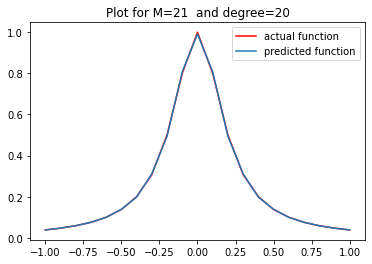

In [46]:
Q7d_func_nontruncated(M=21,degree=20)

In [47]:
def Q7d_func_truncated(M,degree,R_dash):  # R' (R_dash)(truncation ammount)
	#Setting the value of M
	
	X= np.linspace(-1, 1, M).reshape([M,1])
	Y = 1/(1+25*X**2)

	A = A_matrix_producer(X,degree)

	U, S, Vh = np.linalg.svd(A, full_matrices=False)
	#converting 1D S to diagonal 2D sigma matrix
	U=U[:,0:R_dash]
	S=S[0:R_dash]
	S = np.diag(S)
	Vh=Vh[0:R_dash,:]
	

	# numpy SVD function returns the V matrtix as its conjugate transpose (Hermitian) 
	#so we need to convert this to V by taking conjugate transpose
	V = Vh.T.conj()
	
	alpha_hat = np.dot(np.dot(np.dot(V,np.linalg.inv(S)),U.T.conj()),Y)  # V S inv Uh

	fx_pred= multi_dot([U, S, Vh, alpha_hat])

	

	plt.plot(X,Y, color = 'r')
	plt.plot(X,fx_pred)
	plt.title(f'Plot for M={M}  degree={degree}  R_dash={R_dash}')
	plt.legend(["actual function", "predicted function"], loc ="upper right")
	plt.show()

changing values of R' from 1 to 21

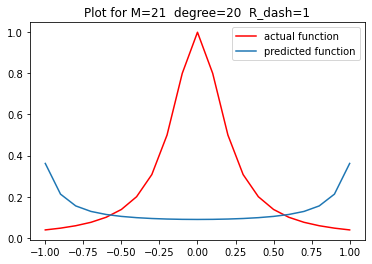

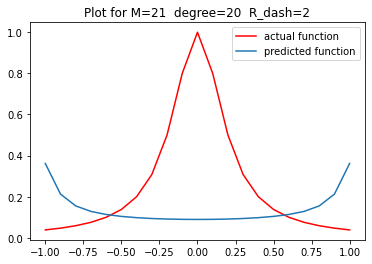

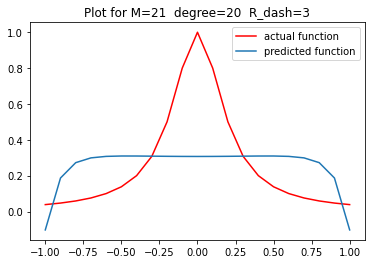

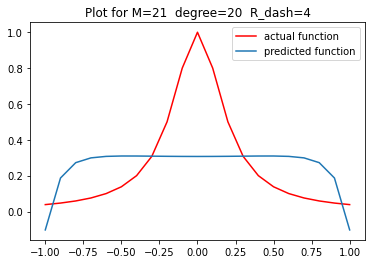

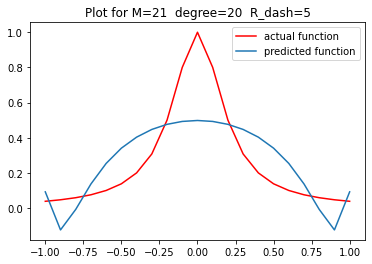

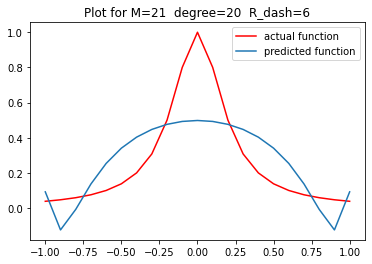

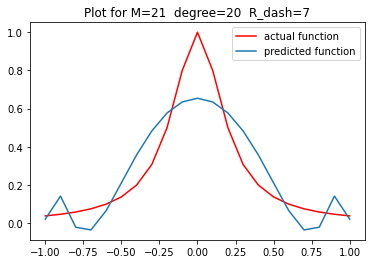

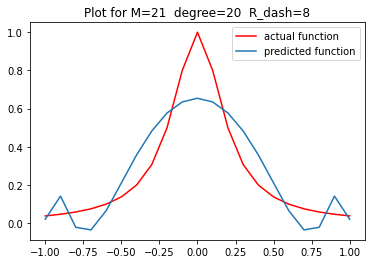

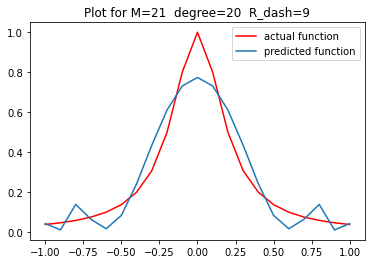

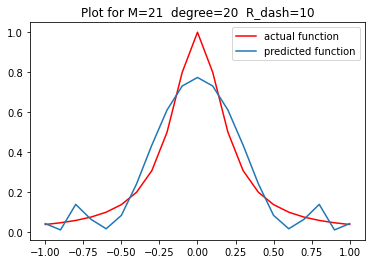

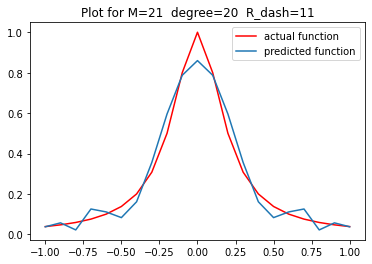

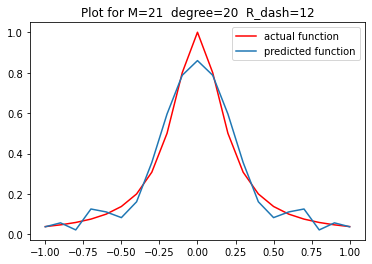

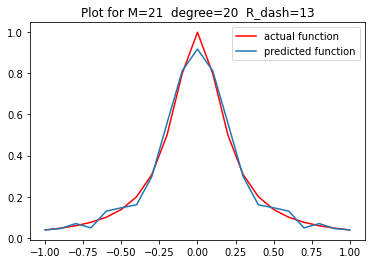

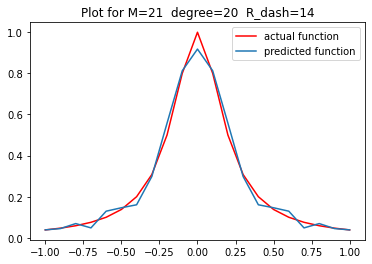

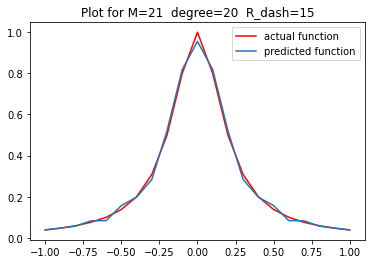

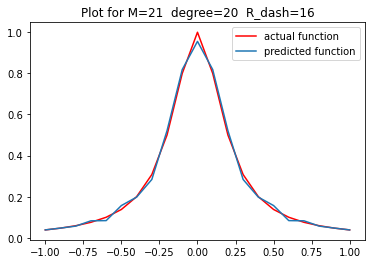

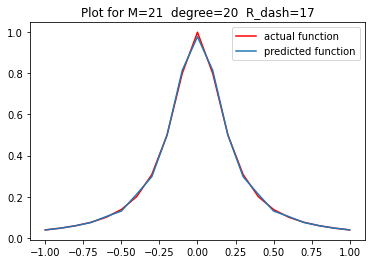

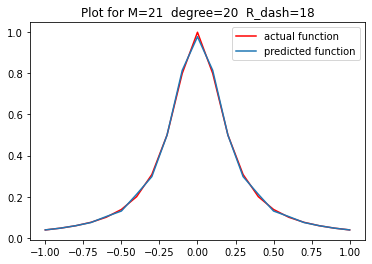

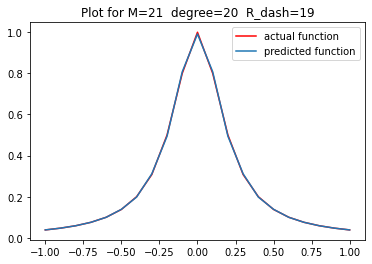

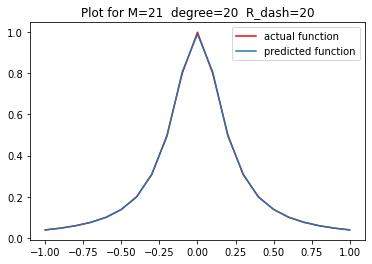

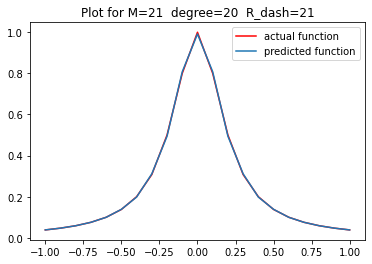

In [48]:
for i in range(1,22):
    Q7d_func_truncated(M=21,degree=20,R_dash=i)

Comment on which value of R' gives the best estimate of the original f(x)?

the best value for R' that gives the best estimate of the given function is R'=17 as show im result above. it all depends on application to chose the value of R' there always trade offs in Engineering. if we have more memory and computing power then we would use higher value of R' for good estimation and vice versa  

How does this compare to the result you obtained in
problem 4(c) in the last homework where you instead chose a smaller value of M ?


In [49]:
def HW_2_Q4c_func(M):
	#Setting the value of M
	

	X= np.linspace(-1, 1, M).reshape([M,1])
	f_x = 1/(1+25*X**2)

	A = A_matrix_producer(X,M)

	alphas=np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,f_x))

	fx_pred = np.dot(A,alphas)

	plt.plot(X,f_x, color = 'r')
	plt.scatter(X,fx_pred)
	plt.title(f'Plot for M={M}')
	plt.legend(["actual function", "predicted function"], loc ="lower right")
	plt.show()

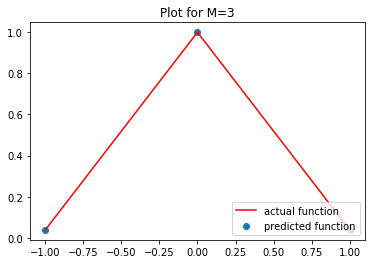

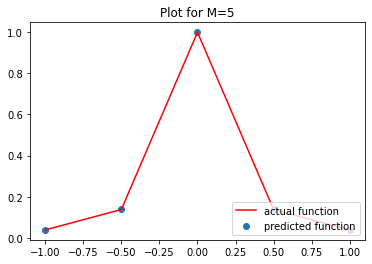

In [50]:
HW_2_Q4c_func(M=3)
HW_2_Q4c_func(M=5)

As shown in results above the smaller value of M cause imperfect estimation of the original function. (that is by reducing the number of observation the the function estimate distorts). but in case of reducing the R' the observation remains the same but we chop of some eigen values which is low order estimate of the function


Look at
the singular values of X (or the singular values for the X matrix formed when M is set to
be smaller than 21) and comment if you observe anything interesting

In [51]:
def singular_vals(M,degree):
	
	X= np.linspace(-1, 1, M).reshape([M,1])

	A = A_matrix_producer(X,degree)

	U, S, Vh = np.linalg.svd(A, full_matrices=False)
	print(f'singular values for M={M} are {S}')
	
	

In [52]:
for i in range(1,22):
    singular_vals(M=i,degree=20)

singular values for M=1 are [4.47213595]
singular values for M=2 are [4.47213595 4.47213595]
singular values for M=3 are [4.48382497 4.47213595 0.94621015]
singular values for M=4 are [4.50303913 4.47531052 1.32198284 0.44339124]
singular values for M=5 are [4.53009782 4.48228731 1.60453539 0.66515695 0.19238826]
singular values for M=6 are [4.56535871 4.49345973 1.83425868 0.84233512 0.30658474 0.08139571]
singular values for M=7 are [4.6090414  4.50909717 2.02729887 0.99087837 0.40374102 0.13745913
 0.03312606]
singular values for M=8 are [4.66110313 4.52934058 2.19246461 1.11797399 0.48812887 0.18851271
 0.05858905 0.01338943]
singular values for M=9 are [4.72118742 4.55418148 2.33552295 1.22805927 0.56185832 0.23496191
 0.08289561 0.02481166 0.00517662]
singular values for M=10 are [4.78865768e+00 4.58346510e+00 2.46069841e+00 1.32434034e+00
 6.26529228e-01 2.76963737e-01 1.05638488e-01 3.63449023e-02
 9.90306943e-03 2.02285533e-03]
singular values for M=11 are [4.86268166e+00 4.61